## Del 1: Hente og utforske data
- Hent strømpriser for de siste 2–3 årene (områder NO1–NO5).  
- Lag en dataframe med: dato, time, pris (øre/kWh), område.  
- Rens data (manglende verdier, datatype, outliers).

**Spørsmål:**  
- Hvordan ser datasettet ut?  datasettet ser komplett ut
- Hvor mye varierer prisene mellom ulike områder?  Prisene varier mellom lavest -0.7073 til høyest 13.15831 

## Del 1: Hente og utforske data
- Hent strømpriser for de siste 2–3 årene (områder NO1–NO5). 

Denne oppgaven kan løses på to måter.

1 - laste ned en fil hvor data ligger og bruke denne.
    data_fil = "C:/Users/retm/Downloads/spotpriser.xlsx"
    df = pd.read_excel(data_fil)

2 - løsningen jeg liker er og gå på nettet og hente de siste data. - denne har jeg fortsatt ikke klart og løse jobber med den
    - progblem siste tre år = 365 * 3 nedlastinger dette tar tid
    - løsning jeg henter ned per mnd, dette gpr raskere - nedlasting på år har jeg feiler av og til

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_fil = "C:/Users/retm/Downloads/spotpriser.xlsx"
df = pd.read_excel(data_fil)

her har vi hentet inn aktuelle bibeloteker for oppgaven 1. og vi har lastet in data_filen som på min pc ligger på downloads. dette er en excel fil. vi har også laget dataframe som heter df.
Det er nå greit og se hvordan datasettet ser ut. da kan man bruke df.head(1) jeg har satt 1 i panates pga at jeg trenger ikke mere en første linje i datasett. setter jeg ikke noe får jeg 5 linjer

In [3]:
df.head(1)

,Dato/klokkeslett,NO1,NO2,NO3,NO4,NO5
0,2023-01-25 Kl. 00-01,1.62044,1.62044,0.18131,0.14505,1.62044


- Rens data (manglende verdier, datatype, outliers).
Det er også intresant og se om datasettet er komplett. Det gjøres ved df.isna().sum(). Nå skal jeg har 0 per omeråde. da er data settet komplett

In [4]:
df.isna().sum()

Dato/klokkeslett    0
NO1                 0
NO2                 0
NO3                 0
NO4                 0
NO5                 0
dtype: int64

siste oppgave i kap 1 er:
- Lag en dataframe med: dato, time, pris (øre/kWh), område.
 Denne kan man si er løst men jeg ønsker og splitte kolonne Dato/Klokkeseltt opp i to dato og klokkeslett

In [5]:
split_data = df['Dato/klokkeslett'].str.replace("Kl."," ", regex=False).str.strip()


Her har vi delt opp i dato og klokkeslett, jeg har fjernet Kl. Dvs jeg her byttet ut med mellomrom for så og fjerne mellomrommet

In [6]:
ny_kolonne = split_data.str.split(" ", n=1, expand=True)
df["Dato"] = ny_kolonne[0]
df["Klokkeslett"] = ny_kolonne[1]
df.head(1)

,Dato/klokkeslett,NO1,NO2,NO3,NO4,NO5,Dato,Klokkeslett
0,2023-01-25 Kl. 00-01,1.62044,1.62044,0.18131,0.14505,1.62044,2023-01-25,00-01


Nå har jeg utvidet tablellen med to kolonner, har har jeg brukt exspand komando til utvidelse og laget ny data frame. nå gjenstår det og fjerne Dato/Klokkeslett

In [7]:
df = df.drop(columns=[col for col in ["Dato/klokkeslett"] if col in df.columns])

df.head(1)


,NO1,NO2,NO3,NO4,NO5,Dato,Klokkeslett
0,1.62044,1.62044,0.18131,0.14505,1.62044,2023-01-25,00-01


vi mangler kunn og finne svaret på dette 
- Hvor mye varierer prisene mellom ulike områder?  

In [8]:
df_num = df.apply(pd.to_numeric, errors='coerce')

print("Min verdi:", df_num.min().min())
print("Maks verdi:", df_num.max().max())


Min verdi: -0.7073
Maks verdi: 13.15831


Når jeg kom til oppgave 2 så jeg at denne laget problemer. jeg gjorde derform om til numetriske verdier og kalte den df_num. Da har jeg ikke endret på data frame (df)

## Del 2: Visualisering av strømpriser
Lag minst **3–4 forskjellige visualiseringer** og forklar hvorfor den formen passer.

Forslag:  
1. Linjediagram: Pris over tid (dag/måned/år).  løst
2. Boksplott: Fordeling av priser per måned eller område.  løst 
3. Histogram: Hvilke prisnivåer er vanligst?  løst
4. Heatmap: Pris per time på døgnet vs måned.   løst

**Spørsmål:**  
- Når på året er prisene høyest/lavest?  
- Hvordan varierer prisen gjennom døgnet?  
- Hvilke forskjeller ser vi mellom områder?  

Her trenger vi litt forarbeid.
For at tabellene ikke skal bli for omfattende - så tar jeg førs og lager gjennomsitts pris per dag.
Dette gjøres med grupby dato og så komandon mean 

In [9]:
snitt_pris_per_dato = df.groupby("Dato")[["NO1","NO2","NO3","NO4","NO5"]].mean()


Det første jeg lager er linje diagram for alle zoner.
Dette gir en fin historisk utvikling på zooner

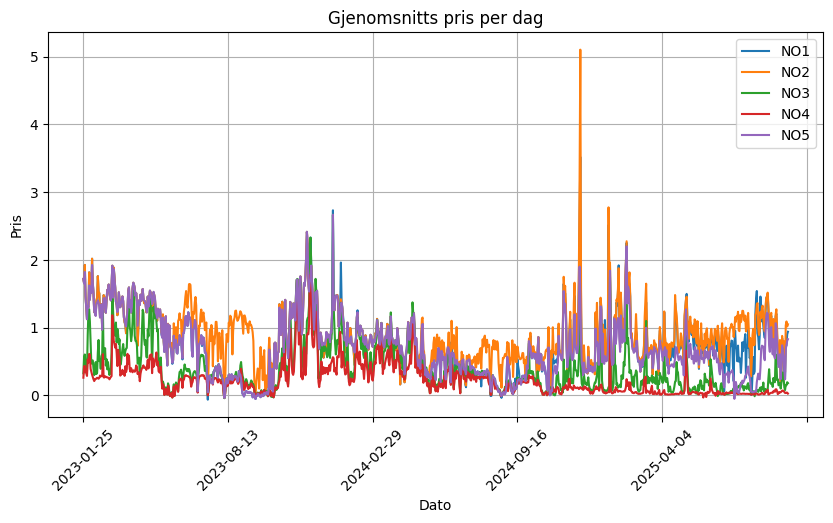

In [10]:
snitt_pris_per_dato.plot(figsize=(10,5))

plt.title("Gjenomsnitts pris per dag")
plt.xlabel("Dato")
plt.xticks(rotation=45)
plt.ylabel("Pris")
plt.grid(True)
plt.show()

tiltle er overskrift på diagramet xlable og ylabel er komentar til akser, xtricks roterer teksent på x akse, grid lager rutenett, show fjerner alt unødvendig og lager en pen utskrift 

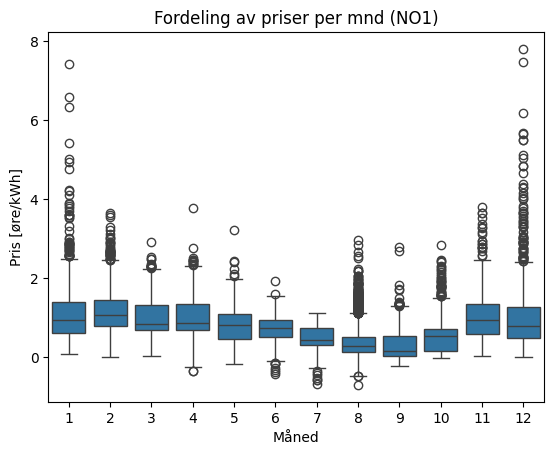

In [11]:
sns.boxplot(x=pd.to_datetime(df["Dato"]).dt.month, y=df["NO1"])
plt.title("Fordeling av priser per mnd (NO1)")
plt.xlabel("Måned")
plt.ylabel("Pris [øre/kWh]")
plt.show()

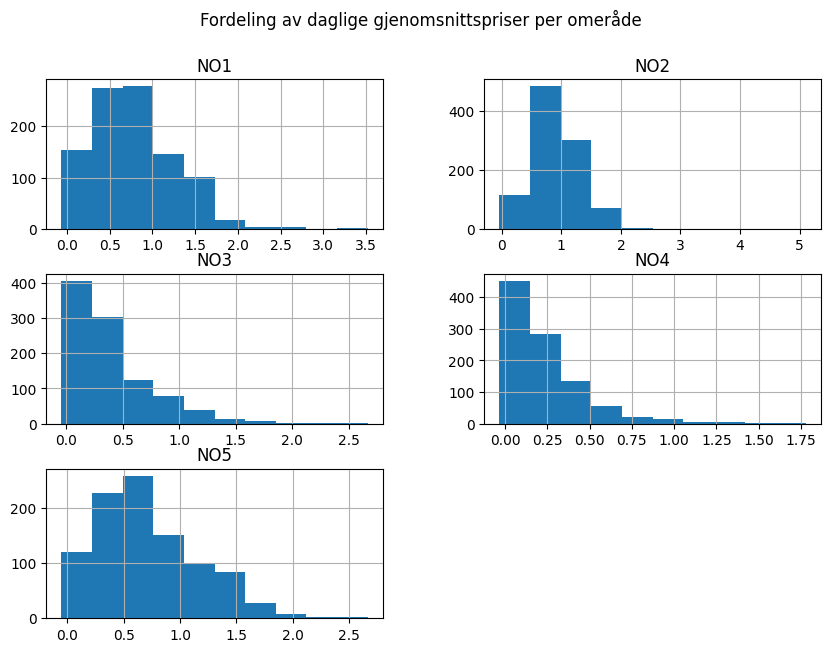

In [12]:
snitt_pris_per_dato.hist(figsize=(10,7))
plt.suptitle("Fordeling av daglige gjenomsnittspriser per omeråde")
plt.show()

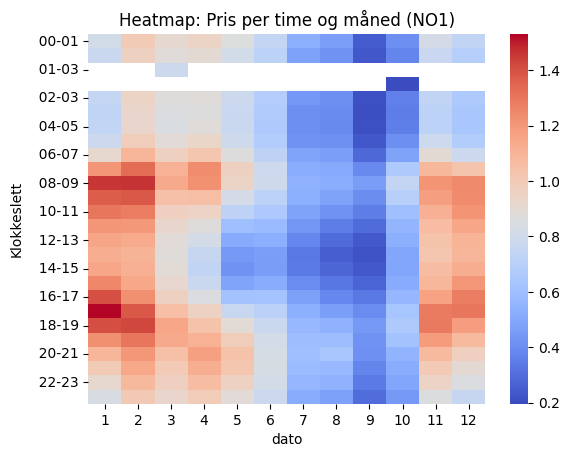

In [13]:
df["dato"] = pd.to_datetime(df["Dato"], errors="coerce")
pivot = df.pivot_table(values="NO1", index=df["Klokkeslett"], columns=df["dato"].dt.month, aggfunc="mean")
sns.heatmap(pivot, cmap="coolwarm")
plt.title("Heatmap: Pris per time og måned (NO1)")
plt.show()

**Spørsmål:**  
- Når på året er prisene høyest/lavest?  
- Hvordan varierer prisen gjennom døgnet?  
- Hvilke forskjeller ser vi mellom områder?  

In [14]:
df.max()

NO1                        7.79699
NO2                       13.15831
NO3                        7.41484
NO4                        3.87357
NO5                        7.41484
Dato                    2025-09-25
Klokkeslett                  23-00
dato           2025-09-25 00:00:00
dtype: object

Her brukes df.max() for og finne de dyreste prisene per kolonne, og vi ser at det er NO2 som er dyres. for og finne datoen gjør vi det på følgende måte

In [15]:
dyreste_rad = df.loc[df["NO2"].idxmax()]
dyreste_dato = dyreste_rad["Dato"]
dyreste_dato

'2024-12-12'

det er altså 2024-12-12 som er dyrest med en strøm prise på 13 kr og 16 øre

In [16]:
df.min()

NO1                        -0.7073
NO2                        -0.7073
NO3                       -0.17896
NO4                       -0.27575
NO5                       -0.25684
Dato                    2023-01-25
Klokkeslett                  00-01
dato           2023-01-25 00:00:00
dtype: object

På samme måte som vi fant det dyreste kan vi finne det billigste med df.min(), og finne billigste dato

In [17]:
billigste_rad = df.loc[df["NO1"].idxmin()]
billigste_dato = billigste_rad["Dato"]
billigste_dato

'2024-08-11'

## Del 3: Brukerfunksjoner med postnummer
Lag funksjoner som tar inn **postnummer** → finner hvilket NO-område det tilhører → returnerer:  
- Dagens strømpriser (time for time).  
- Snittpris siste 3 år.  
- Gjennomsnittspris per time (når på døgnet er strømmen dyrest/billigst?).  
- Lag en rapport med grafer for dette området.

Lag funksjoner som tar inn **postnummer** → finner hvilket NO-område det tilhører → returnerer: 

In [18]:
def hent_omerade(postnummer):
    if 0 <= postnummer <= 2999:
        return "NO1"
    elif 3000 <= postnummer <= 5999:
        return "NO2"
    elif 6000 <= postnummer <= 7999:
        return "NO3"
    elif 8000 <= postnummer <= 8999:
        return "NO4"
    else:
        return "NO5"

bruker_postnummer = int(input("Skriv ditt postnummer: "))
omrade = hent_omerade(bruker_postnummer)
print("Omeråde:", omrade)

Omeråde: NO1


jeg har hentet zoonene fra https://www.astrom.no/no/strom/prisomrader Så er jo dette enelt bare en if, elif, else betinget hendelse. jeg bruker vidre denne zonen inn i neste program

In [19]:
import requests, urllib3, pandas as pd
from urllib3.exceptions import InsecureRequestWarning
from datetime import datetime

urllib3.disable_warnings(category=InsecureRequestWarning)

def hent_strom_priser(omrade, dato=None):
    if dato is None:
        dato = datetime.now()
    dato_str = dato.strftime("%Y/%m-%d")
    url = f"https://www.hvakosterstrommen.no/api/v1/prices/{dato_str}_{omrade}.json"
    try:
        import certifi
        r = requests.get(url, verify=certifi.where())
        r.raise_for_status()
        return r.json()
    except requests.exceptions.SSLError:
        r = requests.get(url, verify=False)
        r.raise_for_status()
        return r.json()


vi henter dagens strømpriser med valgt zone. Det jeg ikke helt skjøner er hvorfor jeg klarer og hente en sone og ikke alle soner samtigig. Jeg har prøvd flere løsninger men alle feilet. omrade = [["NO1","NO2",NO3","NO4","NO5"]] her lager vi en liste som ligger i omrade. Jeg får feil 404 når jeg prøver og laste ned

In [20]:
def lag_dataframe(pris_json):
    rows = []
    for seg in pris_json:
        start = seg["time_start"]
        end = seg["time_end"]
        pris = seg["NOK_per_kWh"]
        rows.append({"Fra": start, "Til": end, "Pris (NOK/kWh)": pris})
    return pd.DataFrame(rows)


Her lager lager vi en data_frame som vi bruker i vindu og bruker omrade variabel på hvor vi henter fra

In [ ]:
priser = hent_strom_priser(omrade)
df = lag_dataframe(priser)
df.head(24)



In [22]:
from datetime import datetime, timedelta

def hent_priser_siste_tre_ar_maneder(omrade):
    idag = datetime.now()
    start = idag - timedelta(days=365*3)

    alle_rader = []
    alle_priser = []

    year = start.year
    month = start.month

    while (year < idag.year) or (year == idag.year and month <= idag.month):
        try:
            url_dato = f"{year}/{month:02d}"
            pris_json = hent_strom_priser(omrade, dato=datetime(year, month, 1))
            alle_rader.extend(pris_json)
            for seg in pris_json:
                alle_priser.append(seg["NOK_per_kWh"])
        except Exception as e:
            print(f"⚠️ Ingen data for {year}-{month:02d}: {e}")

        if month == 12:
            year += 1
            month = 1
        else:
            month += 1

    return alle_rader, alle_priser

alle_rader_3aar, alle_priser_3aar = hent_priser_siste_tre_ar_maneder(omrade)


⚠️ Ingen data for 2023-04: HTTPSConnectionPool(host='www.hvakosterstrommen.no', port=443): Max retries exceeded with url: /api/v1/prices/2023/04-01_NO1.json (Caused by SSLError(SSLError(1, '[SSL: DECRYPTION_FAILED_OR_BAD_RECORD_MAC] decryption failed or bad record mac (_ssl.c:1010)')))
⚠️ Ingen data for 2023-11: HTTPSConnectionPool(host='www.hvakosterstrommen.no', port=443): Max retries exceeded with url: /api/v1/prices/2023/11-01_NO1.json (Caused by SSLError(SSLError(1, '[SSL: DECRYPTION_FAILED_OR_BAD_RECORD_MAC] decryption failed or bad record mac (_ssl.c:1010)')))
⚠️ Ingen data for 2024-02: HTTPSConnectionPool(host='www.hvakosterstrommen.no', port=443): Max retries exceeded with url: /api/v1/prices/2024/02-01_NO1.json (Caused by SSLError(SSLError(1, '[SSL: DECRYPTION_FAILED_OR_BAD_RECORD_MAC] decryption failed or bad record mac (_ssl.c:1010)')))
⚠️ Ingen data for 2024-08: HTTPSConnectionPool(host='www.hvakosterstrommen.no', port=443): Max retries exceeded with url: /api/v1/prices/20

så kontaker jeg nett på nytt for og hente ned priser de siste tre år, dette gjøres mnd for mnd, dag for dag tar for lang tid.if month == 12: year += 1 month = 1  else: month += 1 her er løkken som teller til 12 mnd for så og legge 1 på år. og dette er   start = idag - timedelta(days=365*3) start dato altså tre år tilbake fra i dag

In [23]:
if alle_priser_3aar:
    snitt = sum(alle_priser_3aar) / len(alle_priser_3aar)
    print(f"Snittpris siste 3 år i {omrade}: {snitt:.2f} NOK/kWh")
else:
    print("Fant ingen data.")


Snittpris siste 3 år i NO1: 0.71 NOK/kWh


så regner vi snitt pris for alle tre årene det er sum / antall = snitt

In [ ]:
startdato = datetime.now() - timedelta(days=365*3)
timer = pd.date_range(start=startdato, periods=len(alle_priser_3aar), freq="H")

df3aar = pd.DataFrame({"Fra": timer,"Pris (NOK/kWh)": alle_priser_3aar})

df3aar.head()



Her lager vi en liste over alle priser per time, for de siste tre år

In [ ]:
df3aar["Hour"] = df3aar["Fra"].dt.hour
snitt_per_time = df3aar.groupby("Hour")["Pris (NOK/kWh)"].mean()

print("Gjennomsnittspris per time (snitt over 3 år):")
print(snitt_per_time)

print(f"\nBilligst time: kl {snitt_per_time.idxmin()}:00, {snitt_per_time.min():.2f} NOK/kWh")
print(f"Dyrest time: kl {snitt_per_time.idxmax()}:00, {snitt_per_time.max():.2f} NOK/kWh")



Så lager vi gjennomsnitt prisen per time for alle tre år, og så finer man og min pris

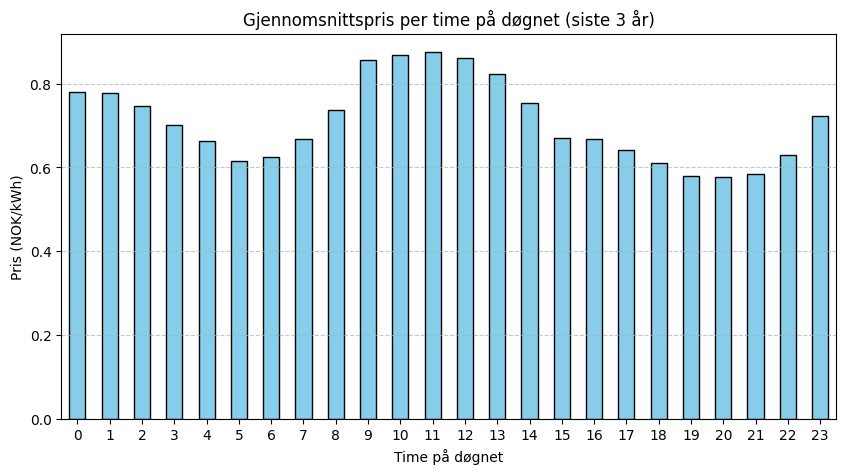

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
snitt_per_time.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Gjennomsnittspris per time på døgnet (siste 3 år)")
plt.xlabel("Time på døgnet")
plt.ylabel("Pris (NOK/kWh)")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


så lager vi ett stolpe diagram som viser utviklingen for gjenomsnittspris siste tre års

## Del 4: Prediksjonsmodell

Bygg en enkel modell som estimerer **forventet gjennomsnittspris framover**.  
Start med månedlige gjennomsnittspriser og utvid deretter til døgn- og timepriser.  

- **Input:** måned, område, evt. årstrend.  
- **Modell:** enkel lineær regresjon eller sesongmønster.  
- **Output:** predikert snittpris neste måned(er).  

**Spørsmål:**  
- Lønner det seg med Norgespris (40 øre/kWh) i mitt område?  I mitt omeråde lønner det seg med norges pris
- Hvilke perioder vil det mest sannsynlig være lønnsomt/ulønnsomt?  det vil være lønsomt i alle perioder

### Ekstraoppgave: Prediksjoner på flere tidsskalaer
Prøv å lage modeller på ulike nivåer:  
1. **Månedlige priser** – Estimer gjennomsnitt per måned framover.  
2. **Døgnpriser** – Prediker gjennomsnittspris per dag for neste uke/måned.  
3. **Timepriser** – Lag en enkel modell som predikerer time-for-time pris for et døgn.  

Sammenlign minst to ulike modeller (f.eks. lineær regresjon, logistisk regresjon eller gjennomsnitt av historiske mønstre).  

**Diskusjon:**  
- Hvilke modeller passer best for månedlige trender?  linær regresjon synes jeg er bedre en snitt av historiske mønstre 
- Er det mulig å forutsi timepriser nøyaktig med enkle modeller? nei, mine modeller er forenkle  
- Hvordan påvirker tidsskalaen usikkerheten i prediksjonene?  

Jeg starter med og hent ned priser. Boks 1 lager nett tilgang til www.hvakosterstrommen.no. på denne oppgaven fkk jeg voksen opplæring om hvordan jeg kunne hente filer mm fra min bror

In [27]:
import pandas as pd
import requests
from datetime import date, timedelta
import urllib3

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

def hent_priser_for_dato(dato: date, område="NO2"):
    url = f"https://www.hvakosterstrommen.no/api/v1/prices/{dato.year}/{dato.strftime('%m-%d')}_{område}.json"
    # Bruk verify=False for å hoppe over sertifikatkontroll
    resp = requests.get(url, verify=False)
    if resp.status_code == 200:
        return resp.json()
    else:
        return None


så setter vi start og slutt punkt for når prisen skal hentes, og jeg setter jeg ikke omeråde men lager en input komando så bruker skal sette sone selv. Jeg avslutter input med upper() dette gjør alle bokstaer stor, selv om jeg legger inn så bokstaver

In [ ]:
from datetime import date, timedelta

område = input("Skriv inn strømområde (f.eks. NO1, NO2, NO3, NO4, NO5): ").upper()

slutt = date.today()
start = slutt - timedelta(days=365*3)

alle_data = []

print(f"\nHenter data for område {område} fra {start} til {slutt}...\n")


her lager vi datafame dvs i praksis lastes hele tabellen ned for det omeråde og vi satte i forje kodevindu, denne hvil nå laste inn strømdata avhengi av hvilken sone som ble valgt i den forje input. Dette kan ta noe tid. jeg for også en feilmelding hvis jeg kjører flere ganger traceback feil.

In [ ]:
for d in pd.date_range(start, slutt, freq="D"):
    priser = hent_priser_for_dato(d.to_pydatetime().date(), område)
    
    if priser:
        for seg in priser:
            alle_data.append({
                "Dato": seg["time_start"][:10],
                "Tid": seg["time_start"][11:16],
                "Pris": seg["NOK_per_kWh"],
                "Område": område
            })

df = pd.DataFrame(alle_data)
df["Dato"] = pd.to_datetime(df["Dato"])
df.head()


Hår vi har lastet ned data kan vi lage gjennomsittspriser, og vi kan sette startsdato

In [ ]:
startdato_str = input("Skriv inn startdato (for eks 2024-12-12): ")
startdato = pd.to_datetime(startdato_str)

df_filtrert = df[df["Dato"] >= startdato].copy()

df_filtrert["ÅrMåned"] = df_filtrert["Dato"].dt.to_period("M")
df_mnd = (df_filtrert.groupby(["Område", "ÅrMåned"])["Pris"].mean().reset_index())
df_mnd["ÅrMåned"] = df_mnd["ÅrMåned"].dt.to_timestamp()

print("\nGjennomsnittspriser per måned fra valgt startdato:\n")
print(df_mnd.head())


I denne oppgaven måtte jeg ty til CHATGPT, den mente at feilen var at jeg ikke hadde impotert bibloteker, men det gjore jeg i første oppgave i del 4 - jeg trodde det holdt, at jeg kunne jobbe med data og biboteker fra boks til boks. men jeg i alle fall løst oppgaven selv med litt hjelp derifra. 

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np  
import pandas as pd

df_område = df_mnd[df_mnd["Område"] == område].copy()

df_område["Måned"] = df_område["ÅrMåned"].dt.month
df_område["Tid"] = np.arange(len(df_område))

X = pd.get_dummies(df_område[["Tid", "Måned"]].astype(int), columns=["Måned"], drop_first=True)
y = df_område["Pris"].values

modell = LinearRegression()
modell.fit(X, y)

n_frem = 6
framtid_tid = np.arange(len(df_område), len(df_område) + n_frem)
framtid_mnd = [(df_område["ÅrMåned"].iloc[-1] + pd.offsets.MonthBegin(i+1)).month for i in range(n_frem)]

X_frem = pd.DataFrame({"Tid": framtid_tid, "Måned": framtid_mnd})
X_frem = pd.get_dummies(X_frem.astype(int), columns=["Måned"], drop_first=True)
X_frem = X_frem.reindex(columns=X.columns, fill_value=0)

y_pred = modell.predict(X_frem)

framtid = pd.DataFrame({
    "ÅrMåned": pd.date_range(df_område["ÅrMåned"].iloc[-1] + pd.offsets.MonthBegin(),
                             periods=n_frem, freq="MS"),
    "Predikert pris": y_pred,
    "Område": område
})


Jeg har valg og dele programmet opp. først hadde jeg bare delen over med komando print(framtid). Dette løste oppgaven men jeg hadde lyst til og heller ha ett plot

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.plot(df_område["ÅrMåned"], df_område["Pris"], color="gray", marker="o", label="Historisk pris")
plt.plot(framtid["ÅrMåned"], framtid["Predikert pris"], color="blue", marker="o", label="Predikert pris (Lineær regresjon)")
plt.axhline(0.40, color="red", linestyle="--", label="Norgespris (0.40 kr/kWh)")

plt.title(f"Forventet gjennomsnittspris fremover ({område}) - Lineær regresjon")
plt.xlabel("Måned")
plt.ylabel("Pris (NOK/kWh)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
hist_snitt = df_område.groupby("Måned")["Pris"].mean()
framtid_hist = framtid.assign(Predikert_pris=[hist_snitt.get(m, hist_snitt.mean()) for m in framtid_mnd],Modell="Historisk snitt")[["ÅrMåned", "Predikert_pris", "Modell", "Område"]]


siden jeg delte opp det andre programmet er det ryddigst og dele opp dette også. del 1 av programmet gruperer per mnd og regner gjennomsnitts pris, sp bruker linje to gjenomsnittspris til og forutsi fremtiden. boks to printer den

In [ ]:
framtid_hist.plot(x="ÅrMåned", y="Predikert_pris", marker="o", title=f"Historisk snittmodell ({område})", grid=True, figsize=(10,5))
plt.show()

## Del 5: Realistisk brukerperspektiv
Legg inn forbruksmønster:  
- Typisk husholdning bruker mest strøm morgen (06–09) og kveld (16–22).  
- Regn ut **vektet pris** basert på forbruksmønster.  
- Sammenlign med Norgespris (40 øre/kWh).

**Spørsmål:**  
- Hva er den faktiske prisen når jeg bruker mest strøm?  
- Hvordan endrer dette vurderingen av Norgespris?  

---

## Individuell leveranse
 
1. Notebook med kode, visualiseringer og analyser for alle delene
2. Kommentarer i kode; skriv kommentarer for de ulike stegne 
3. Notebook leveres på egen repo på girhub. 
4. README.md skal inneholde:
    - Kort sammendrag av hva dere har gjort.
    - En illustrasjon/eksempel på resultatet.



Vi starter med og lage en boks som vektet gjenommsnitts pris, dvs at den tar hensyn at at man bruker mere strøm enkelte timere på dagen enn andre. jeg hadde støtte undervisning av min bror som lærte meg denne 

In [61]:
def beregn_vektet_pris(df_dag, forbruksprofil):
    return (s := sum(df_dag["Pris"] * df_dag["Tid"].map(lambda t: forbruksprofil.get(t, 0)))) / sum(df_dag["Tid"].map(lambda t: forbruksprofil.get(t, 0))) if sum(df_dag["Tid"].map(lambda t: forbruksprofil.get(t, 0))) else None


så lager en forbruker profil med økt strømforbruk fra 6 til 9 og nytt høyt strømforbruk 16 til 22. for koden teller opp til. dvs at kl 10 og kl 23 blir ikke med.

In [ ]:
forbruksprofil = {str(h).zfill(2)+":00": 0.03 for h in range(24)}

for h in range(6, 10):
    forbruksprofil[f"{str(h).zfill(2)}:00"] += 0.05

for h in range(16, 23):
    forbruksprofil[f"{str(h).zfill(2)}:00"] += 0.05

total = sum(forbruksprofil.values())
for h in forbruksprofil:
    forbruksprofil[h] /= total

forbruksprofil


​Denne koden svarer kort på spørsmålet hva koster strømmen i dag for en husholding. det som skjer er at programmet henter strømprisene for den siste dagen i datasettet og beregner vektet gjennomsnittspris basert på et typisk husholdningsforbruk gjennom døgnet.

In [60]:
df_dag = df[df["Dato"] == df["Dato"].max()]

vektet_pris = beregn_vektet_pris(df_dag, forbruksprofil)

print("Dato:", df_dag["Dato"].iloc[0].date())
print("Område:", df_dag["Område"].iloc[0])
print(f"Vektet pris (husholdningsmønster): {vektet_pris:.2f} kr/kWh")



Dato: 2025-10-09
Område: NO1
Vektet pris (husholdningsmønster): 0.67 kr/kWh


her setter vi dette opp mot norges pris

In [63]:
NORGESPRIS = 0.40 

print(f"Norgespris: {NORGESPRIS:.2f} kr/kWh")

if vektet_pris > NORGESPRIS:
    print("Du betaler MER enn Norgespris i dag.")
else:
    print("Du betaler MINDRE enn Norgespris i dag.")


Norgespris: 0.40 kr/kWh
Du betaler MER enn Norgespris i dag.


Strømanalyse – innlevering
Del 1 – Hente og utforske data

Jeg startet med å hente historiske strømpriser fra forbruker.no
.
Dataene ble hentet for alle prisområder (NO1–NO5).
Deretter brukte jeg pandas for å finne når prisene var høyest og lavest, og for å sammenligne gjennomsnitt mellom områdene.

Eksempel:

NO2 var dyrest 12. desember 2024

NO1 var billigst 25. januar 2023

Del 2 – Visualisering av strømpriser

Jeg lagde flere forskjellige grafer for å vise hvordan strømprisene varierer:

Linjediagram – viser pris over tid mellom områdene.

Boksplott – viser variasjon per måned.

Histogram – viser hvilke prisnivåer som er vanligst.

Heatmap – viser pris per time og måned.

Disse plottene viser at prisene ofte er høyest om vinteren og på dagtid, spesielt i sør.

Del 3 – Brukerfunksjoner med postnummer

Her lagde jeg funksjoner som finner hvilket NO-område man tilhører ut fra postnummer.
Programmet henter deretter:

Dagens timepriser

Snittpris siste 3 år

Gjennomsnittspris per time på døgnet

Til slutt vises dette med grafer for valgt område.

Del 4 – Prediksjonsmodell

I denne delen bygde jeg en enkel lineær regresjon som predikerer gjennomsnittsprisen fremover i tid.
Jeg brukte historiske månedlige priser for å trene modellen, og den predikerer 6 måneder fram i tid.
Jeg sammenlignet dette med en enkel snittmodell for å se forskjeller.

Til slutt sammenligner jeg alt mot Norgespris (0.40 kr/kWh) for å se om det ville lønne seg med fastpris.


Del 5 – Realistisk brukerperspektiv

Til slutt la jeg inn et forbruksmønster som ligner et vanlig husholdningsforbruk –
mest strøm om morgenen (06–09) og ettermiddagen (16–22).

Programmet beregner da en vektet pris, som viser hva strømmen faktisk koster når man bruker mest.
Eksempelresultat:

Dato: 2025-10-09  
Område: NO1  
Vektet pris (husholdningsmønster): 0.67 kr/kWh  
Norgespris: 0.40 kr/kWh  
→ Du betaler MER enn Norgespris i dag.


Dette gir et mer realistisk bilde av hva man faktisk betaler for strømmen.

Oppsummering

I prosjektet har jeg:

Hentet og bearbeidet strømdata

Visualisert og analysert prisvariasjoner

Bygd en enkel modell for prediksjon

Regnet ut vektet pris basert på faktisk bruk

Alt er laget i Python med bibliotekene: pandas, matplotlib, scikit-learn, requests og datetime.

For å kjøre prosjektet:
Åpne Innlevering_Erik.ipynb i Jupyter Notebook (Python 3.12) og kjør cellene steg for steg.

Norsken er kjørt gjennom ChatGPT for retting, jeg har også henvist i oppgavn hvor jeg har fått hjelp eller brukt ChatGPt